In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
# load WHO timeseries data
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/who_covid_19_situation_reports/who_covid_19_sit_rep_time_series/who_covid_19_sit_rep_time_series.csv'

In [3]:
data = pd.read_csv(url)

In [6]:
# show data example
data.head(100)

,Province/States,Country/Region,WHO region,1/21/2020,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,5/24/2020,5/25/2020,5/26/2020,5/27/2020,5/28/2020,5/29/2020,5/30/2020,5/31/2020,6/1/2020,6/2/2020
0,Confirmed,Globally,NaN,282.0,314.0,581.0,846.0,1320.0,2014.0,2798.0,...,5204508.0,5304772.0,5404512.0,5488825.0,5593631.0,5701337.0,5817385.0,5934936.0,6057853.0,6194533.0
1,Deaths,Globally,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,337687.0,342029.0,343514.0,349095.0,353334.0,357688.0,362705.0,367166.0,371166.0,376320.0
2,Confirmed,China,Western Pacific Region,278.0,309.0,571.0,830.0,1297.0,1985.0,2741.0,...,84525.0,84536.0,84543.0,84544.0,84547.0,84547.0,84565.0,84570.0,84588.0,84597.0
3,Confirmed,Outside of China,NaN,4.0,5.0,10.0,16.0,23.0,29.0,57.0,...,5119983.0,5220236.0,5319969.0,5404281.0,5509084.0,5616790.0,5732820.0,5850366.0,5973265.0,6109936.0
4,Deaths,China,Western Pacific Region,NaN,NaN,NaN,NaN,NaN,NaN,80.0,...,4645.0,4645.0,4645.0,4645.0,4645.0,4645.0,4645.0,4645.0,4645.0,4645.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,NaN,Croatia,European Region,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2243.0,2244.0,2244.0,2244.0,2244.0,2245.0,2245.0,2246.0,2246.0,2246.0
96,NaN,Estonia,European Region,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1821.0,1823.0,1824.0,1834.0,1840.0,1851.0,1859.0,1865.0,1869.0,1870.0
97,NaN,Kyrgyzstan,European Region,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1403.0,1433.0,1468.0,1520.0,1594.0,1662.0,1722.0,1748.0,1817.0,1845.0
98,NaN,Iceland,European Region,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1804.0,1804.0,1804.0,1804.0,1805.0,1805.0,1805.0,1806.0,1806.0,1806.0


In [59]:
# extract information on several countries
category = 'Country/Region'
country_1 = 'Russian Federation'
country_2 = 'Italy'
country_3 = 'United States of America'
country_4 = 'Brazil'
country_5 = 'Germany'
countries = [country_1, country_2, country_3, country_4, country_5]

selection = []
for country in countries:
    selection.append(data[data[category] == country])
    
selection = pd.concat(selection)
selection

,Province/States,Country/Region,WHO region,1/21/2020,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,5/24/2020,5/25/2020,5/26/2020,5/27/2020,5/28/2020,5/29/2020,5/30/2020,5/31/2020,6/1/2020,6/2/2020
59,NaN,Russian Federation,European Region,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,344481.0,353427.0,362342.0,370680.0,379051.0,387623.0,396575.0,405843.0,414878.0,423741.0
62,NaN,Italy,European Region,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,229327.0,229858.0,230158.0,230555.0,231139.0,231732.0,232248.0,232664.0,233019.0,233197.0
152,NaN,United States of America,Region of the Americas,0.0,0.0,1.0,1.0,2.0,2.0,5.0,...,1568448.0,1592599.0,1618757.0,1634010.0,1658896.0,1675258.0,1694864.0,1716078.0,1734040.0,1783638.0
153,NaN,Brazil,Region of the Americas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,330890.0,347398.0,363211.0,374898.0,391222.0,411821.0,438238.0,465166.0,498440.0,514849.0
63,NaN,Germany,European Region,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,178281.0,178570.0,179002.0,179364.0,179717.0,180458.0,181196.0,181482.0,181815.0,182028.0


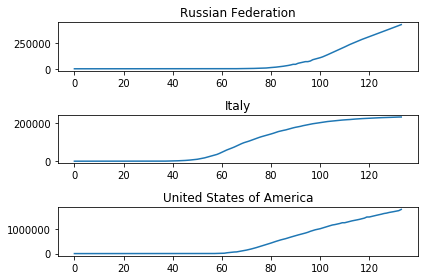

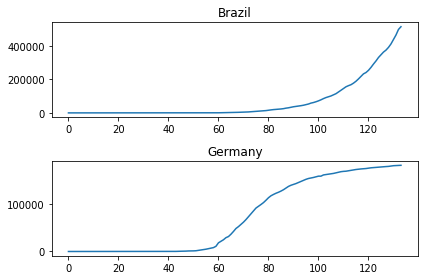

In [60]:
# show number of cases in the selected countries
# number of columns
n = len(selection.iloc[0, 3:])
# generate x-axis values
x = list(range(n))

fig1, axs1 = plt.subplots(3)
fig2, axs2 = plt.subplots(2)

for i in range(len(selection)):
    if i <= 2:
        axs1[i].plot(x, selection.iloc[i, 3:])
        axs1[i].set_title(countries[i])
    else:
        axs2[i - 3].plot(x, selection.iloc[i, 3:])
        axs2[i - 3].set_title(countries[i])

fig1.tight_layout()
fig2.tight_layout()

In [61]:
# calculate daily gain
deltas = selection.copy()
for i in range(4, len(selection.columns)):
    deltas.iloc[:, i] = data[data.columns[i]] - data[data.columns[i-1]]

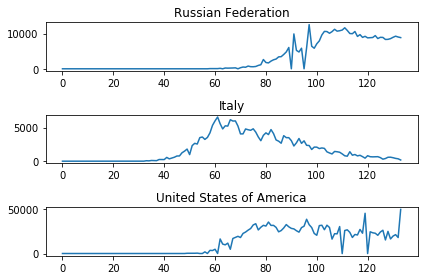

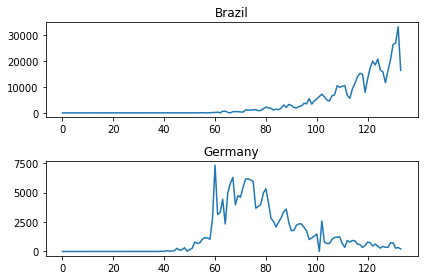

In [62]:
fig1, axs1 = plt.subplots(3)
fig2, axs2 = plt.subplots(2)

for i in range(len(selection)):
    if i <= 2:
        axs1[i].plot(x, deltas.iloc[i, 3:])
        axs1[i].set_title(countries[i])
    else:
        axs2[i - 3].plot(x, deltas.iloc[i, 3:])
        axs2[i - 3].set_title(countries[i])

fig1.tight_layout()
fig2.tight_layout()

In [63]:
deltas.iloc[4, 98:110]

4/25/2020    2055
4/26/2020    1737
4/27/2020    1018
4/28/2020    1144
4/29/2020    1304
4/30/2020    1478
5/1/2020        0
5/2/2020     2584
5/3/2020      793
5/4/2020      679
5/5/2020      685
5/6/2020     1037
Name: 63, dtype: object

In [64]:
selection.iloc[4, 98:110]

4/25/2020    152438
4/26/2020    154175
4/27/2020    155193
4/28/2020    156337
4/29/2020    157641
4/30/2020    159119
5/1/2020     159119
5/2/2020     161703
5/3/2020     162496
5/4/2020     163175
5/5/2020     163860
5/6/2020     164897
Name: 63, dtype: object